## 数式処理システムって何
数式処理システムCoCalcと言われても、「数式システム」って何と思われる方が多いのではないでしょうか。

私たちが日常で使う電卓と比べてみましょう。電卓で以下のように入力してみます。

```
1/2+1/3=0.833333333333333
```

Macの「計算機」で実行してみます。

電卓では、計算の途中結果を二進数（bit）で行なっています。
最初に1/2の結果0.5を計算して、次に1/3の結果0.333333333333333を計算して、その和を求めます。
そして0.833333333333333の結果を返します。
<img src="images/cal.png" width="300px"/>


## CoCalcで計算
それでは、数式システムCoCalcで同じ計算を行なってみましょう。

In [1]:
1/2 + 1/3

5/6

数式システムでは5/6の分数で答えが返されました。数式システムでは1/2+1/3の計算を式の通り計算しています。

分数の計算は、分母を同じ値6に通分してから足し算をします。

$$
\frac{1}{2} + \frac{1}{3} = \frac{2}{6} + \frac{3}{6} = \frac{5}{6}
$$

In [85]:
N(1/2+1/3, digits=32)

0.83333333333333333333333333333333

In [77]:
print(8^64)
print(mod(8^64, 11))

6277101735386680763835789423207666416102355444464034512896
4


In [65]:
x, y = var('x y')

eq = y^2 == x^3 + 1/10*x + 10
show(eq)

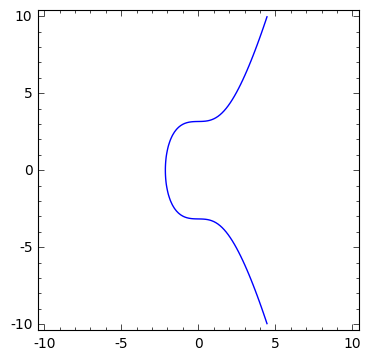

In [87]:
implicit_plot(eq, [x,-10, 10], [y, -10, 10], figsize=5)

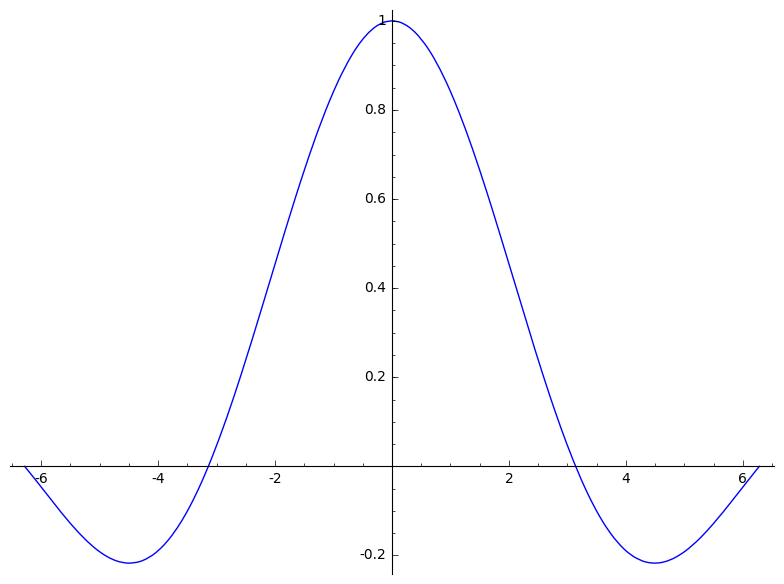

In [2]:
plot(sin(x)/x, [x, -2*pi, 2*pi])

'SageMath version 7.5.1, Release Date: 2017-01-15'